# Modeling and Simulation in Python

Chapter 9

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [49]:
# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import everything from SymPy.
from sympy import *

# Set up Jupyter notebook to display math.
init_printing() 

The following displays SymPy expressions and provides the option of showing results in LaTeX format.

In [50]:
from sympy.printing import latex

def show(expr, show_latex=False):
    """Display a SymPy expression.
    
    expr: SymPy expression
    show_latex: boolean
    """
    if show_latex:
        print(latex(expr))
    return expr

### Analysis with SymPy

Create a symbol for time.

In [3]:
t = symbols('t')

If you combine symbols and numbers, you get symbolic expressions.

In [4]:
expr = t + 1

The result is an `Add` object, which just represents the sum without trying to compute it.

In [5]:
type(expr)

sympy.core.add.Add

`subs` can be used to replace a symbol with a number, which allows the addition to proceed.

In [6]:
expr.subs(t, 2)

`f` is a special class of symbol that represents a function.

In [7]:
f = Function('f')

f

The type of `f` is `UndefinedFunction`

In [8]:
type(f)

sympy.core.function.UndefinedFunction

SymPy understands that `f(t)` means `f` evaluated at `t`, but it doesn't try to evaluate it yet.

In [9]:
f(t)

`diff` returns a `Derivative` object that represents the time derivative of `f`

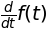

In [10]:
dfdt = diff(f(t), t)

In [11]:
type(dfdt)

sympy.core.function.Derivative

We need a symbol for `alpha`

In [12]:
alpha = symbols('alpha')

Now we can write the differential equation for proportional growth.

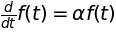

In [13]:
eq1 = Eq(dfdt, alpha*f(t))

And use `dsolve` to solve it.  The result is the general solution.

In [14]:
solution_eq = dsolve(eq1)

We can tell it's a general solution because it contains an unspecified constant, `C1`.

In this example, finding the particular solution is easy: we just replace `C1` with `p_0`

In [15]:
C1, p_0 = symbols('C1 p_0')

In [16]:
particular = solution_eq.subs(C1, p_0)

In the next example, we have to work a little harder to find the particular solution.

### Solving the quadratic growth equation 

We'll use the (r, K) parameterization, so we'll need two more symbols:

In [17]:
r, K = symbols('r K')

Now we can write the differential equation.

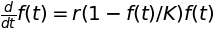

In [18]:
eq2 = Eq(diff(f(t), t), r * f(t) * (1 - f(t)/K))

And solve it.

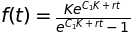

In [19]:
solution_eq = dsolve(eq2)

The result, `solution_eq`, contains `rhs`, which is the right-hand side of the solution.

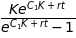

In [20]:
general = solution_eq.rhs

We can evaluate the right-hand side at $t=0$

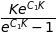

In [21]:
at_0 = general.subs(t, 0)

Now we want to find the value of `C1` that makes `f(0) = p_0`.

So we'll create the equation `at_0 = p_0` and solve for `C1`.  Because this is just an algebraic identity, not a differential equation, we use `solve`, not `dsolve`.

The result from `solve` is a list of solutions.  In this case, [we have reason to expect only one solution](https://en.wikipedia.org/wiki/Picard%E2%80%93Lindel%C3%B6f_theorem), but we still get a list, so we have to use the bracket operator, `[0]`, to select the first one.

In [22]:
solutions = solve(Eq(at_0, p_0), C1)
type(solutions), len(solutions)

(list, 1)

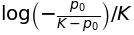

In [23]:
value_of_C1 = solutions[0]

Now in the general solution, we want to replace `C1` with the value of `C1` we just figured out.

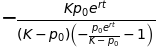

In [24]:
particular = general.subs(C1, value_of_C1)

The result is complicated, but SymPy provides a method that tries to simplify it.

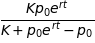

In [25]:
particular = simplify(particular)

Often simplicity is in the eye of the beholder, but that's about as simple as this expression gets.

Just to double-check, we can evaluate it at `t=0` and confirm that we get `p_0`

In [26]:
particular.subs(t, 0)

This solution is called the [logistic function](https://en.wikipedia.org/wiki/Population_growth#Logistic_equation).

In some places you'll see it written in a different form:

$f(t) = \frac{K}{1 + A e^{-rt}}$

where $A = (K - p_0) / p_0$.

We can use SymPy to confirm that these two forms are equivalent.  First we represent the alternative version of the logistic function:

In [27]:
A = (K - p_0) / p_0

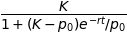

In [28]:
logistic = K / (1 + A * exp(-r*t))

To see whether two expressions are equivalent, we can check whether their difference simplifies to 0.

In [29]:
simplify(particular - logistic)

This test only works one way: if SymPy says the difference reduces to 0, the expressions are definitely equivalent (and not just numerically close).

But if SymPy can't find a way to simplify the result to 0, that doesn't necessarily mean there isn't one.  Testing whether two expressions are equivalent is a surprisingly hard problem; in fact, there is no algorithm that can solve it in general.

### Exercises

**Exercise:** Solve the quadratic growth equation using the alternative parameterization

$\frac{df(t)}{dt} = \alpha f(t) + \beta f^2(t) $

In [30]:
#Creates symbols and the function (I know the alerady existed)
t, alpha, beta = symbols('t alpha beta')
f = Function('f')

f

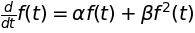

In [31]:
#Wites the differential equation
eq3 = Eq(diff(f(t), t), alpha * f(t) + beta*f(t)**2)

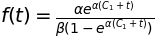

In [32]:
#Everything below this was pretty much copy pasted from the above example, but operates on the exercise function
#Solves the differential equation
solution_eq = dsolve(eq3)

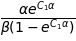

In [33]:
#Sets t == 0; only looking at the right hand side of the equation from now on
general = solution_eq.rhs
at_0 = general.subs(t, 0)

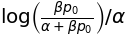

In [34]:
#Solves for the constant at t == 0
solutions = solve(Eq(at_0, p_0), C1)
value_of_C1 = solutions[0]

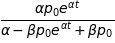

In [35]:
#Substitutes in the constant at t == 0; simplifies
particular = general.subs(C1, value_of_C1)
particular = simplify(particular)

In [36]:
#Demonstrates that the equation with the new constant is equal to p_0 at t == 0
particular.subs(t, 0)

**Exercise:**  Use [WolframAlpha](https://www.wolframalpha.com/) to solve the quadratic growth model, using either or both forms of parameterization:

    df(t) / dt = alpha f(t) + beta f(t)^2

or

    df(t) / dt = r f(t) (1 - f(t)/K)

Find the general solution and also the particular solution where `f(0) = p_0`.

#### Solving df(t) / dt = alpha f(t) + beta f(t)^2           

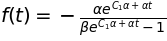

In [64]:
t, alpha, beta = symbols('t alpha beta')

#Took the solution from WolframAlpha
solution = Eq(f(t), -(alpha * exp(alpha * C1 + alpha * t))/(beta * exp(alpha * C1 + alpha * t) - 1))

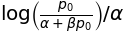

In [65]:
#This is the value of C1 tht results in f(0) == p_0
solutionrhs = solution.rhs
at_0 = solutionrhs.subs(t,0)

solutions = solve(Eq(at_0, p_0), C1)
value_of_C1 = solutions[0]


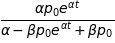

In [74]:
#Substitutes in the desired C1 value and simplifies
particular = solutionrhs.subs(C1, value_of_C1)
particular = simplify(particular)

In [75]:
#This shows that the above equation does in fact equal p_0 when t is 0
particular.subs(t, 0)

#### df(t) / dt = r f(t) (1 - f(t)/K)

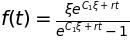

In [81]:
#I'm not sure why, but WolframAlpha seems to get rid of K, and adds ξ
t, r, K , ξ= symbols('t r K ξ')


solution = Eq(f(t), (ξ * exp(C1 * ξ + r * t))/(exp(C1 * ξ + r * t) - 1))

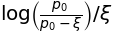

In [82]:
#This is the value of C1 tht results in f(0) == p_0
solutionrhs = solution.rhs
at_0 = solutionrhs.subs(t,0)

solutions = solve(Eq(at_0, p_0), C1)
value_of_C1 = solutions[0]



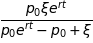

In [83]:
#Substitutes in the desired C1 value and simplifies
particular = solutionrhs.subs(C1, value_of_C1)
particular = simplify(particular)

In [84]:
#This shows that the above equation does in fact equal p_0 when t is 0
particular.subs(t, 0)